In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
data=pd.read_csv('g3.csv')

In [16]:
data

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster,Unnamed: 9,ADD
0,21-05-19 11:53,0,98,1.620359,97.282104,0.137211,10.061290,28.213074,2,NaN,137.314039
1,21-05-19 11:54,1,96,1.586915,97.476720,0.135318,10.035237,28.137848,2,NaN,137.372038
2,21-05-19 11:55,2,96,1.558073,97.546370,0.134258,10.022614,28.149506,2,NaN,137.410821
3,21-05-19 11:56,3,96,1.536727,97.521300,0.133044,10.019047,28.144989,2,NaN,137.355106
4,21-05-19 11:57,4,98,1.510011,97.643640,0.132248,10.018088,28.144043,2,NaN,137.448031
...,...,...,...,...,...,...,...,...,...,...,...
4974,25-05-19 0:51,143,86,76.474670,101.003090,-0.284334,9.963284,26.190490,0,NaN,213.347200
4975,25-05-19 0:52,144,86,76.304344,101.060036,-0.281613,9.960735,26.205017,0,NaN,213.248519
4976,25-05-19 0:53,145,86,76.132810,100.933650,-0.278773,9.958983,26.215302,0,NaN,212.961972
4977,25-05-19 0:54,146,84,76.036200,100.961590,-0.275675,9.962255,26.193726,0,NaN,212.878096


In [8]:
DO=data['DO']

In [9]:
COND=data['COND']

array([0.00560909, 0.00934848, 0.0215015 , 0.02804544, 0.03178483,
       0.04954694, 0.08787571, 0.12807418, 0.08974541, 0.05515603,
       0.03271968, 0.01682726, 0.0215015 , 0.01589242, 0.01963181,
       0.03832877, 0.04954694, 0.0448727 , 0.03645907, 0.04767725,
       0.03926362, 0.04393786, 0.05609088, 0.05796058, 0.06824391,
       0.10189843, 0.10002874, 0.16172871, 0.22623322, 0.39637556,
       0.40665889, 0.39824525, 0.21594989, 0.28793319, 0.2823241 ,
       0.14957568, 0.10096359, 0.07478784, 0.10376813, 0.08694087,
       0.08226663, 0.12713933, 0.12713933, 0.04767725, 0.06543936,
       0.01402272, 0.0018697 ])

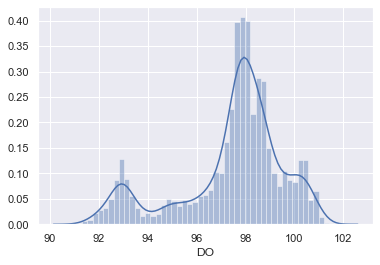

In [12]:
do=[]
for h in sns.distplot(DO).patches: 
    do.append(h.get_height())
do=np.array(do)
do

In [19]:
do.shape

(47,)

In [13]:
def turning_points(array):
    ''' turning_points(array) -> min_indices, max_indices
    Finds the turning points within an 1D array and returns the indices of the minimum and 
    maximum turning points in two separate lists.
    '''
    idx_max, idx_min = [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)
    def get_state(a, b):
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    idx_max.append((begin + i - 1) // 2)
                else:
                    idx_min.append((begin + i - 1) // 2)
            begin = i
            ps = s
    return idx_min, idx_max
if __name__ == "__main__":
    X=turning_points(do)

In [14]:
X

([11, 13, 18, 20, 26, 32, 37, 40, 43], [7, 12, 16, 19, 25, 30, 33, 38, 42, 44])

array([3.22900467e-01, 1.23106256e-03, 3.62077223e-04, 8.68985335e-04,
       1.59313978e-03, 7.96569890e-04, 5.79323556e-04, 5.79323556e-04,
       1.80314457e-02, 1.08623167e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.24154446e-05, 1.95521700e-03,
       2.82420234e-03, 4.34492667e-03, 2.82420234e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.17246334e-04, 1.44830889e-04,
       0.00000000e+00, 7.24154446e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.24154446e-05])

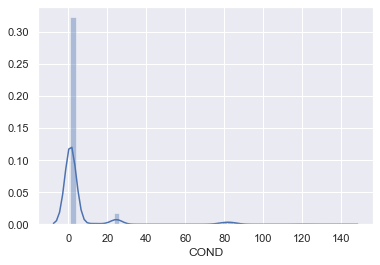

In [15]:
cond=[]
for h in sns.distplot(COND).patches: 
    cond.append(h.get_height())
cond=np.array(cond)
cond

In [24]:
cond.shape

(50,)

In [17]:
def turning_points(array):
    ''' turning_points(array) -> min_indices, max_indices
    Finds the turning points within an 1D array and returns the indices of the minimum and 
    maximum turning points in two separate lists.
    '''
    idx_max, idx_min = [], []
    if (len(array) < 3): 
        return idx_min, idx_max

    NEUTRAL, RISING, FALLING = range(3)
    def get_state(a, b):
        if a < b: return RISING
        if a > b: return FALLING
        return NEUTRAL

    ps = get_state(array[0], array[1])
    begin = 1
    for i in range(2, len(array)):
        s = get_state(array[i - 1], array[i])
        if s != NEUTRAL:
            if ps != NEUTRAL and ps != s:
                if s == FALLING: 
                    idx_max.append((begin + i - 1) // 2)
                else:
                    idx_min.append((begin + i - 1) // 2)
            begin = i
            ps = s
    return idx_min, idx_max
if __name__ == "__main__":
    X=turning_points(cond)

In [18]:
X

([2, 6, 17, 36, 44, 47], [4, 8, 29, 42, 45])

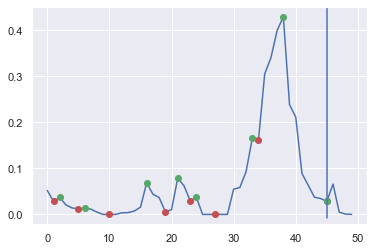

In [74]:
plt.plot(array)
plt.plot(1,array[1],'ro',label='zero')
plt.plot(5,array[5],'ro',label='zero')
plt.plot(10,array[10],'ro',label='zero')
plt.plot(19,array[19],'ro',label='zero')
plt.plot(23,array[23],'ro',label='zero')
plt.plot(27,array[27],'ro',label='zero')
plt.plot(34,array[34],'ro',label='zero')
plt.plot(45,array[45],'ro',label='zero')
plt.plot(2,array[2],'go',label='zero')
plt.plot(6,array[6],'go',label='zero')
plt.plot(16,array[16],'go',label='zero')
plt.plot(21,array[21],'go',label='zero')
plt.plot(24,array[24],'go',label='zero')
plt.plot(33,array[33],'go',label='zero')
plt.plot(38,array[38],'go',label='zero')
plt.plot(45,array[45],'go',label='zero')
plt.axvline(45,array[45], label='pyplot vertical line')

In [21]:
do=np.reshape(do, (47, 1))

In [25]:
cond=np.reshape(cond, (50, 1))

In [29]:
do=pd.DataFrame(do)

In [30]:
do.to_csv('do.csv')

In [32]:
cond=pd.DataFrame(cond)

In [33]:
cond.to_csv('cond.csv')